<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Machine-Learning-Project" data-toc-modified-id="Machine-Learning-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Machine Learning Project</a></span></li><li><span><a href="#To-Do" data-toc-modified-id="To-Do-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>To Do</a></span></li><li><span><a href="#Questions-I-want-to-try-and-answer-with-dataset" data-toc-modified-id="Questions-I-want-to-try-and-answer-with-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Questions I want to try and answer with dataset</a></span></li><li><span><a href="#Notes:" data-toc-modified-id="Notes:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Notes:</a></span></li><li><span><a href="#Exploring-the-Data" data-toc-modified-id="Exploring-the-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploring the Data</a></span><ul class="toc-item"><li><span><a href="#Graph-out-every-column" data-toc-modified-id="Graph-out-every-column-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Graph out every column</a></span></li></ul></li><li><span><a href="#Break-into-test-and-train" data-toc-modified-id="Break-into-test-and-train-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Break into test and train</a></span></li><li><span><a href="#Run-Decision-Tree-Pipeline-w/-Standard-Scaler" data-toc-modified-id="Run-Decision-Tree-Pipeline-w/-Standard-Scaler-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Run Decision Tree Pipeline w/ Standard Scaler</a></span><ul class="toc-item"><li><span><a href="#Get-Best-Pipeline" data-toc-modified-id="Get-Best-Pipeline-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Get Best Pipeline</a></span></li><li><span><a href="#Get-Classifier" data-toc-modified-id="Get-Classifier-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Get Classifier</a></span></li><li><span><a href="#See-which-features-are-most-important" data-toc-modified-id="See-which-features-are-most-important-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>See which features are most important</a></span></li><li><span><a href="#Find-better-hyperparameters" data-toc-modified-id="Find-better-hyperparameters-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Find better hyperparameters</a></span></li></ul></li><li><span><a href="#Use-PCA,-run-Decision-Tree-Again" data-toc-modified-id="Use-PCA,-run-Decision-Tree-Again-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Use PCA, run Decision Tree Again</a></span><ul class="toc-item"><li><span><a href="#Find-the-number-of-features-that-allows-for-95%-of-variance-to-be-kept" data-toc-modified-id="Find-the-number-of-features-that-allows-for-95%-of-variance-to-be-kept-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Find the number of features that allows for 95% of variance to be kept</a></span></li></ul></li><li><span><a href="#Use-other-ensemble-methods" data-toc-modified-id="Use-other-ensemble-methods-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Use other ensemble methods</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></div>

# Machine Learning Project

# To Do
- In data analysis, look at how many times team 1 wins or team 2
- Get all models working
- Make a function that takes each grid search and outputs all the values that I want
    1. feature importance for each
        https://stackoverflow.com/questions/38787612/how-to-extract-feature-importances-from-an-sklearn-pipeline
        
        https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
    2. confusion matrix
    3. f1 score
    4. roc curve

# Questions I want to try and answer with dataset
1. How well can models predict the winner
2. What are the top features that could determine the winner

# Notes:
1. games.csv has all the data from the played games
2. champion_info.json has the names of all the champions and the number that represents them in games.csv
3. summoner_spell_info.json has the names of all the summoner spells used and the number that represents them in games.csv
4. In all columns that aren't champions or summoners, a 1 represents team1 and a 2 represents team2 respectively. A 0 represents that one of the teamps forfeited before any objective was achieved by any team.
5. In the winners column, a 1 represents team1 and a 2 represents team2 winning respectively.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Exploring the Data

In [17]:
#import data
df = pd.read_csv('games.csv')
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
gameId                51490 non-null int64
creationTime          51490 non-null int64
gameDuration          51490 non-null int64
seasonId              51490 non-null int64
winner                51490 non-null int64
firstBlood            51490 non-null int64
firstTower            51490 non-null int64
firstInhibitor        51490 non-null int64
firstBaron            51490 non-null int64
firstDragon           51490 non-null int64
firstRiftHerald       51490 non-null int64
t1_champ1id           51490 non-null int64
t1_champ1_sum1        51490 non-null int64
t1_champ1_sum2        51490 non-null int64
t1_champ2id           51490 non-null int64
t1_champ2_sum1        51490 non-null int64
t1_champ2_sum2        51490 non-null int64
t1_champ3id           51490 non-null int64
t1_champ3_sum1        51490 non-null int64
t1_champ3_sum2        51490 non-null int64
t1_champ4id           51490 non

In [19]:
df.seasonId.nunique()

1

Looking at the columns already I know I want to drop a few of them. I'm not interested in the gameId, creationTime, or seasonId. I am not comparing one game to the next, I want to compare all of them to each other so they don't require their game Id. Maybe I could come back eventually and convert the creation time to a readable column and see if the time of day a game is played affects anything. All games played were from season 9. 

In [20]:
df = df.drop(columns=['gameId', 'creationTime', 'seasonId'])

In [21]:
df.isna().sum()

gameDuration          0
winner                0
firstBlood            0
firstTower            0
firstInhibitor        0
firstBaron            0
firstDragon           0
firstRiftHerald       0
t1_champ1id           0
t1_champ1_sum1        0
t1_champ1_sum2        0
t1_champ2id           0
t1_champ2_sum1        0
t1_champ2_sum2        0
t1_champ3id           0
t1_champ3_sum1        0
t1_champ3_sum2        0
t1_champ4id           0
t1_champ4_sum1        0
t1_champ4_sum2        0
t1_champ5id           0
t1_champ5_sum1        0
t1_champ5_sum2        0
t1_towerKills         0
t1_inhibitorKills     0
t1_baronKills         0
t1_dragonKills        0
t1_riftHeraldKills    0
t1_ban1               0
t1_ban2               0
t1_ban3               0
t1_ban4               0
t1_ban5               0
t2_champ1id           0
t2_champ1_sum1        0
t2_champ1_sum2        0
t2_champ2id           0
t2_champ2_sum1        0
t2_champ2_sum2        0
t2_champ3id           0
t2_champ3_sum1        0
t2_champ3_sum2  

There is no missing data from any feature

The column that I will be trying to predict against is 'winner' column

In [22]:
games = len(df.winner)
t1_wins = len(df[df.winner == 1])
t2_wins = len(df[df.winner ==2])

print('Team 1 wins {} out of {} games or {}% of games'.format(t1_wins, games, round(t1_wins/games*100, 2)))
print('Team 2 wins {} out of {} games or {}% of games'.format(t2_wins, games, round(t2_wins/games*100, 2)))

Team 1 wins 26077 out of 51490 games or 50.64% of games
Team 2 wins 25413 out of 51490 games or 49.36% of games


As you can see both teams are winning about half the time. So if you just randomly guessed which team would win you'd have a 50% chance of guessing correctly

## Graph out every column

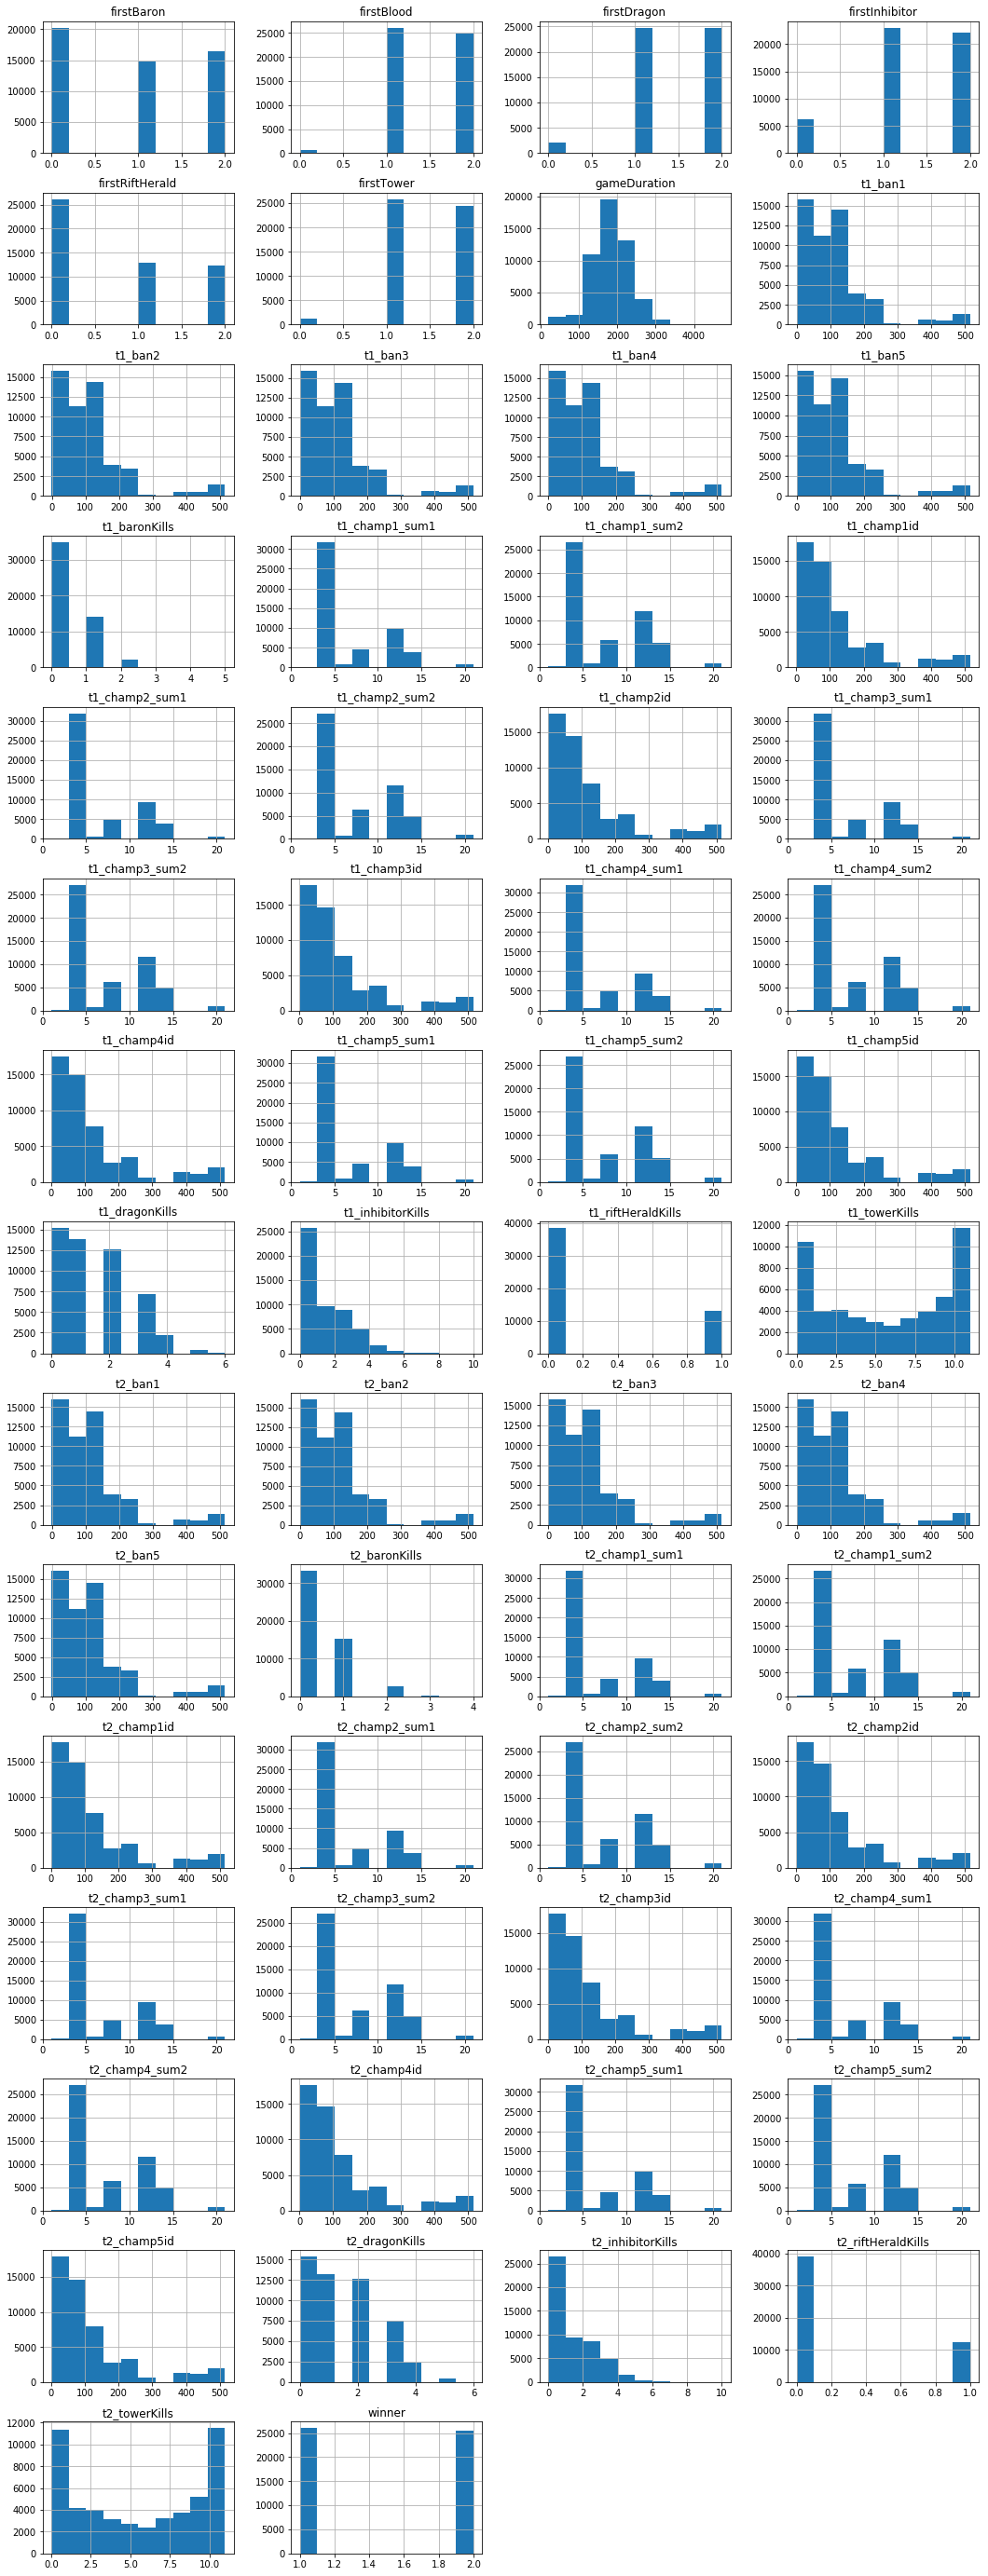

In [23]:
df.hist(figsize=(18,50),layout=(15,4));

Observations:
A lot of these features are categorical. And a few are continuous. I will have to go through and determine which is which before running any predictions.

In [24]:
df_with_dummies = df.copy()

In [25]:
categorical_feature_list = None

continuous_feature_list = ['winner','gameDuration', 't1_dragonKills', 't1_inhibitorKills', 't1_towerKills', 't1_baronKills',
                           't2_dragonKills', 't2_inhibitorKills', 't2_towerKills']

for column in df.columns:
    if column in continuous_feature_list:
        continue
    else:
        dummies = pd.get_dummies(df[column], prefix=column)
        df_with_dummies = pd.concat([df_with_dummies, dummies], axis=1)
        df_with_dummies = df_with_dummies.drop(columns=[column])

In [26]:
df_with_dummies.head()

,gameDuration,winner,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t2_towerKills,t2_inhibitorKills,t2_dragonKills,firstBlood_0,...,t2_ban5_268,t2_ban5_412,t2_ban5_420,t2_ban5_421,t2_ban5_427,t2_ban5_429,t2_ban5_432,t2_ban5_497,t2_ban5_498,t2_ban5_516
0,1949,1,11,1,2,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1851,1,10,4,0,2,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1493,1,8,1,1,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1758,1,9,2,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2094,1,9,2,1,3,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_with_dummies.columns

Index(['gameDuration', 'winner', 't1_towerKills', 't1_inhibitorKills',
       't1_baronKills', 't1_dragonKills', 't2_towerKills', 't2_inhibitorKills',
       't2_dragonKills', 'firstBlood_0',
       ...
       't2_ban5_268', 't2_ban5_412', 't2_ban5_420', 't2_ban5_421',
       't2_ban5_427', 't2_ban5_429', 't2_ban5_432', 't2_ban5_497',
       't2_ban5_498', 't2_ban5_516'],
      dtype='object', length=2986)

In [28]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Columns: 2986 entries, gameDuration to t2_ban5_516
dtypes: int64(9), uint8(2977)
memory usage: 149.7 MB


# Break into test and train

In [29]:
X = df_with_dummies.drop(columns=['winner'])
y = df_with_dummies['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Run Decision Tree Pipeline w/ Standard Scaler

I am running a Decision Tree Classifier first to have a baseline

In [30]:
pipe_dt = Pipeline([('scaler', StandardScaler()),
                    ('clf', DecisionTreeClassifier())])

param_grid_tree = [
    {'clf__max_depth': [5, 10, 15, 20, 50, 100]}
]

gs_dt = GridSearchCV(estimator=pipe_dt,
                    param_grid=param_grid_tree,
                    scoring='accuracy',
                    cv=3, return_train_score=True)

gs_dt.fit(X_train,y_train)

#Best Accuracy
print('Best accuracy %.3f' % gs_dt.best_score_)

#Best Params
print('\nBest params:\n', gs_dt.best_params_)

#pipe_dt.fit(X_train, y_train)
#print(pipe_dt.score(X_test, y_test))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] clf__max_depth=5 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................. clf__max_depth=5, total=   5.5s
[CV] clf__max_depth=5 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................. clf__max_depth=5, total=   5.6s
[CV] clf__max_depth=5 ................................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................. clf__max_depth=5, total=   5.5s
[CV] clf__max_depth=10 ...............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................ clf__max_depth=10, total=   7.0s
[CV] clf__max_depth=10 ...............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................ clf__max_depth=10, total=   6.9s
[CV] clf__max_depth=10 ...............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................ clf__max_depth=10, total=   7.2s
[CV] clf__max_depth=15 ...............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................ clf__max_depth=15, total=   7.6s
[CV] clf__max_depth=15 ...............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................ clf__max_depth=15, total=   8.1s
[CV] clf__max_depth=15 ...............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................ clf__max_depth=15, total=   8.1s
[CV] clf__max_depth=20 ...............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................ clf__max_depth=20, total=   7.7s
[CV] clf__max_depth=20 ...............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................ clf__max_depth=20, total=   8.0s
[CV] clf__max_depth=20 ...............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................ clf__max_depth=20, total=   8.3s
[CV] clf__max_depth=50 ...............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................ clf__max_depth=50, total=   7.9s
[CV] clf__max_depth=50 ...............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................ clf__max_depth=50, total=   8.1s
[CV] clf__max_depth=50 ...............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ................................ clf__max_depth=50, total=   8.2s
[CV] clf__max_depth=100 ..............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ............................... clf__max_depth=100, total=   7.9s
[CV] clf__max_depth=100 ..............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ............................... clf__max_depth=100, total=   8.8s
[CV] clf__max_depth=100 ..............................................


C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV] ............................... clf__max_depth=100, total=   8.5s


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.7min finished
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Best accuracy 0.965

Best params:
 {'clf__max_depth': 10}


## Get Best Pipeline

In [31]:
gs_dt.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [32]:
type(gs_dt.best_estimator_)

sklearn.pipeline.Pipeline

In [35]:
best_pipeline = gs_dt.best_estimator_

## Get Classifier

In [36]:
best_pipeline.steps[1]

('clf',
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'))

In [44]:
display(best_pipeline.steps[1][1].feature_importances_)

array([0.0033476 , 0.22724648, 0.01827762, ..., 0.        , 0.        ,
       0.        ])

## See which features are most important


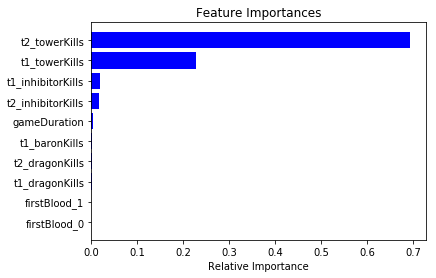

In [43]:
features = X_train.columns
importances = best_pipeline.steps[1][1].feature_importances_[:10]
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Find better hyperparameters


# Use PCA, run Decision Tree Again

## Find the number of features that allows for 95% of variance to be kept

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = X.shape[1] - n_over_95 + 1
print("Number features: {}\tTotal Variance Explained: {}".format(n_to_reach_95, total_explained_variance[n_to_reach_95-1]))

In [ ]:
pipe_pca_dt = Pipeline([('scaler', StandardScaler()),
                    ('pca', PCA(n_components=2634)),
                    ('clf', DecisionTreeClassifier(max_depth=5))])

pipe_pca_dt.fit(X_train, y_train)
print(pipe_pca_dt.score(X_test, y_test))

# Use other ensemble methods

# Random Forest


# SVM


In [ ]:
pipe_svm = Pipeline([('scaler', StandardScaler()),
            ('pca', PCA(n_components=2634)),
            ('clf', svm.SVC(random_state=123))])

pipe_svm.fit(X_train, y_train)
print(pipe_svm.score(X_test, y_test))

C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Andy\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transf

In [ ]:
pipe_svm = Pipeline([('scaler', StandardScaler()),
            ('pca', PCA(n_components=2634)),
            ('clf', svm.SVC(random_state=123))])

# Set grid search params
param_grid_svm = [
  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_svm.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_svm.best_score_)

# Best params
print('\nBest params:\n', gs_svm.best_params_)

# XGBoost